In [1]:
from matplotlib import pyplot as plt
import numpy as np
import sklearn
import pandas as pd
import glob
import csv

In [2]:
df1 = pd.read_csv('mostfreq1000docword.csv',header=None)
df1_transposed = df1.T # or df1.transpose()
df1_transposed

,0,1,2,3,4,5,6,7,8,9,...,421,422,423,424,425,426,427,428,429,430
0,0.047838,0.040797,0.037022,0.053289,0.051535,0.049890,0.050786,0.039157,0.048755,0.041090,...,0.038117,0.028924,0.052405,0.064646,0.062718,0.049268,0.042038,0.036674,0.041244,0.051724
1,0.037313,0.031784,0.033041,0.037926,0.029605,0.029156,0.031299,0.029639,0.029086,0.025599,...,0.049327,0.034139,0.043410,0.036364,0.029268,0.039281,0.026396,0.026976,0.031104,0.053050
2,0.021814,0.023482,0.016919,0.018243,0.012061,0.027472,0.027914,0.026386,0.023645,0.025379,...,0.023543,0.018966,0.016425,0.020202,0.014634,0.017643,0.022485,0.026530,0.028569,0.022546
3,0.020475,0.016603,0.018113,0.024964,0.026316,0.023196,0.024829,0.019639,0.024482,0.019886,...,0.024664,0.014699,0.028158,0.034343,0.026481,0.029627,0.018140,0.017389,0.017843,0.015915
4,0.020283,0.022770,0.019904,0.015362,0.025219,0.015550,0.018133,0.013735,0.018205,0.018677,...,0.017937,0.016596,0.014861,0.008081,0.016725,0.019308,0.016185,0.019842,0.017453,0.009284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000075,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000111,0.000000,0.001326
996,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.001173,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
997,0.000000,0.000237,0.000000,0.000480,0.000000,0.000389,0.000301,0.000241,0.000209,0.000110,...,0.000000,0.000474,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
998,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000075,0.000000,0.000000,0.000000,...,0.000000,0.000474,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [3]:
df2 = pd.read_csv('winners.csv',header=None)
df2_transposed = df2.T
df2_transposed


,0,1,2,3,4,5,6,7,8,9,...,421,422,423,424,425,426,427,428,429,430
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_list = df2_transposed.iloc[0].values.tolist()
#df_list.insert(0, 'row_index')
df1_transposed.columns = df_list


In [5]:
with open('mostfreq1000word.csv') as inf:
    with open('output.csv', 'w') as outf:
        for line in inf:
            outf.write(','.join(line.split('_')))

df3 = pd.read_csv('output.csv', header=None, engine='python', quoting=csv.QUOTE_NONE)
df3[0] = df3[0].str.replace('"','NaN')
df3[0] = df3[0].str.replace("’",'NaN')
df3[0] = df3[0].str.replace("–",'NaN')
df3[0] = df3[0].str.replace("-",'NaN')

df3.columns = ['word','POS_tag']

#print(df3.loc[[984]])


In [15]:
df4 = df3.join(df1_transposed)

df4 = df4[df4.word != 'NaN'] #remove records where not a useful word
df4 = df4.drop_duplicates(subset='word', keep="last")
df4.to_csv(r'C:\Users\chria\ELEC474\251project\cleaned_table.csv', index=False)
df4

,word,POS_tag,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
0,the,AT,0.047838,0.040797,0.037022,0.053289,0.051535,0.049890,0.050786,0.039157,...,0.038117,0.028924,0.052405,0.064646,0.062718,0.049268,0.042038,0.036674,0.041244,0.051724
1,and,CC,0.037313,0.031784,0.033041,0.037926,0.029605,0.029156,0.031299,0.029639,...,0.049327,0.034139,0.043410,0.036364,0.029268,0.039281,0.026396,0.026976,0.031104,0.053050
3,of,IN,0.020475,0.016603,0.018113,0.024964,0.026316,0.023196,0.024829,0.019639,...,0.024664,0.014699,0.028158,0.034343,0.026481,0.029627,0.018140,0.017389,0.017843,0.015915
4,a,AT,0.020283,0.022770,0.019904,0.015362,0.025219,0.015550,0.018133,0.013735,...,0.017937,0.016596,0.014861,0.008081,0.016725,0.019308,0.016185,0.019842,0.017453,0.009284
6,we,PPSS,0.013586,0.010199,0.013734,0.012962,0.002193,0.020086,0.016553,0.018193,...,0.019058,0.016121,0.015643,0.022222,0.018815,0.006658,0.010319,0.009809,0.021743,0.014589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,led,VBD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000075,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000111,0.000000,0.001326
996,september,NP,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.001173,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
997,areas,NNS,0.000000,0.000237,0.000000,0.000480,0.000000,0.000389,0.000301,0.000241,...,0.000000,0.000474,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
998,outstanding,JJ,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000075,0.000000,...,0.000000,0.000474,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [7]:
import numbers
df5 = df4.groupby(by=df4.columns, axis=1).apply(lambda g: g.mean(axis=1) if isinstance(g.iloc[0,0], numbers.Number) else g.iloc[:,0])
#df5

#idx = df5[0].idxmax()
#print(df5.loc[[idx]])
df5

,0,1,POS_tag,word
0,0.045227,0.040089,AT,the
1,0.034644,0.031822,CC,and
2,0.021034,0.022585,TO,to
3,0.025013,0.020689,IN,of
4,0.017429,0.017548,AT,a
...,...,...,...,...
995,0.000055,0.000142,VBD,led
996,0.000058,0.000094,NP,september
997,0.000115,0.000105,NNS,areas
998,0.000025,0.000143,JJ,outstanding


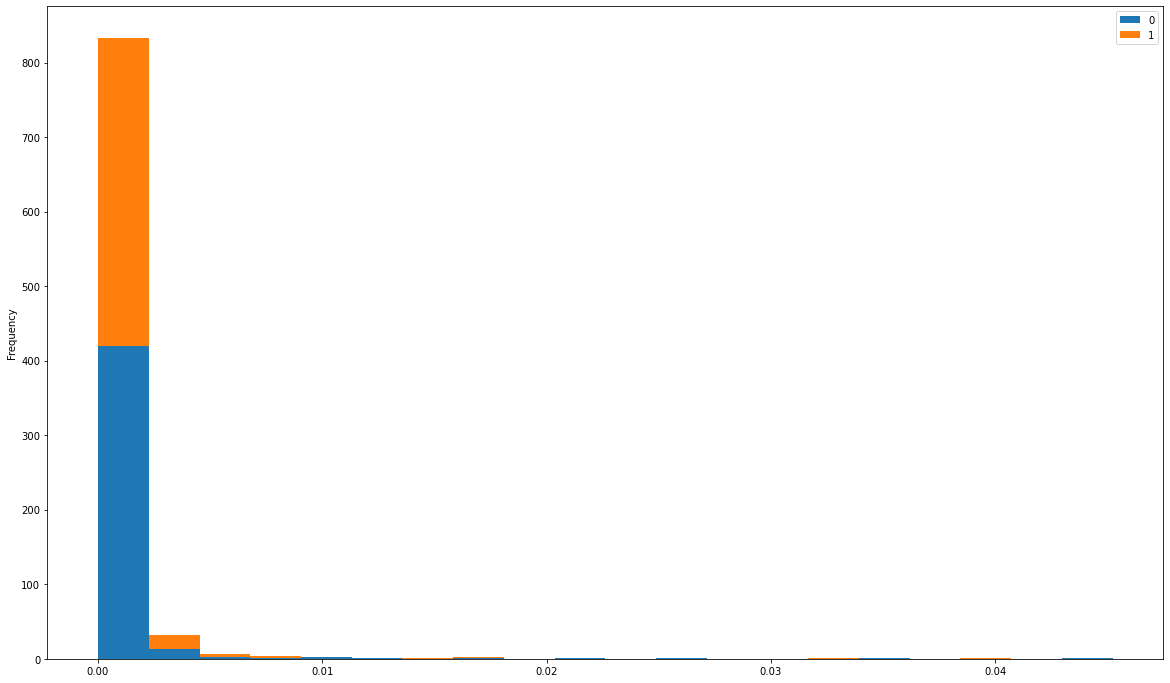

In [8]:
#plt.figure(figsize=(30,30));

#df5.plot.hist(stacked=True, bins = 100, figsize=(20,15))#, density =1)

df5.plot(kind='hist', density=1, bins=20, stacked=True, figsize=(20,12))

In [12]:
#df5["Frequency_Diff"] = abs(df5[0]-df5[1])


#idx = df5["Frequency_Diff"].idxmax()
#print(df5.loc[[idx]])

df5.nlargest(20, 1)

,0,1,POS_tag,word
0,0.045227,0.040089,AT,the
1,0.034644,0.031822,CC,and
2,0.021034,0.022585,TO,to
3,0.025013,0.020689,IN,of
4,0.017429,0.017548,AT,a
5,0.017005,0.015934,IN,in
6,0.011811,0.015332,PPSS,we
7,0.012310,0.011412,PPSS,i
8,0.010242,0.010546,IN,for
10,0.009439,0.009031,PP$,our


In [13]:
sum_df = df4.set_index('word', 'POS_tag').sum(axis=1)
print(sum_df)

word
the            18.008074
and            14.115953
to              9.513814
of              9.531111
a               7.546368
                 ...    
led             0.048899
september       0.035295
areas           0.046694
outstanding     0.044978
streets         0.042007
Length: 994, dtype: float64


In [11]:
df2 = pd.read_csv('winners.csv',header=None)
df2_transposed = df2.T
df2_transposed

,0,1,2,3,4,5,6,7,8,9,...,421,422,423,424,425,426,427,428,429,430
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
